In [2]:
import pandas as pd
import glob
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
# set column width to be able to see full text
pd.set_option('display.max_colwidth', 100)

model_rankings = 'monoT5'

base_path = f'../indexing/results/{model_rankings}/'
# all_model_dirs = glob.glob(f'../indexing/results/{model_rankings}/*')
all_model_csvs = glob.glob(f'{base_path}/*.csv') 
plot_path = f'./plots'
if not os.path.exists(plot_path):
    os.makedirs(plot_path)

In [3]:
number_of_answers = 10

model_dfs = []
for model_csv in all_model_csvs:
    df = pd.read_csv(model_csv)
    model_name = model_csv.split("/")[-1].split(".")[0].replace("_rankings", "")
    df["model"] = model_name
    model_dfs.append(df)

all_model_df = pd.concat(model_dfs, ignore_index=True)
all_model_df['is_natural_question'] = all_model_df['query'].str.endswith('?')
all_model_df


,docno,text,qid,query,score,rank,prompt,answer_number,weighted_position,num_answer_words,num_matching_words,model,is_natural_question
0,gpt2-xl_112,"Asthma is an airway obstruction that causes chronic coughing, wheezing, shortness of breath, dif...",112,symptoms of asthma,-3.157819,58,multimedqa,1,0.276190,385,13,gpt2-xl,False
1,gpt2-xl_109,Ehlers Danlos Syndrome (EDS) is an inherited disorder that causes connective tissue (fatty tissu...,109,ehlers danlos syndrome POTS nausea stomach pain,-4.967661,2,multimedqa,1,0.050000,389,3,gpt2-xl,False
2,gpt2-xl_83,Multiple Sclerosis (MS) is an autoimmune disease that damages the central nervous system causing...,83,Why get episode diagnosed by a doctor as a relapse of multiple sclerosis?,-9.111085,159,multimedqa,1,0.679487,330,19,gpt2-xl,True
3,gpt2-xl_118,What is the difference between Stage 1 and Stage 2 triple negative breast cancer?\nAnswer: The m...,118,stage 4 triple negative breast cancer treatment,-1.564688,50,multimedqa,1,0.224215,340,24,gpt2-xl,False
4,gpt2-xl_81,"Yes, but you must be able to work at least 20 hours per week for your employer or school while s...",81,Can I work and study full-time with multiple sclerosis?,-10.230123,125,multimedqa,1,0.570776,191,11,gpt2-xl,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,gpt2-medium_53,It is the study of mental health issues. \n,53,what is psychotherapy?,-9.155401,34,question,10,0.188889,9,1,gpt2-medium,True
15996,gpt2-medium_108,obesity apathy n=3DQS8HVZ;R9M7JETW4A1X2IHFF6KCPN0G5UYNP\nHere's the video of me doing my 5k run....,108,chronic diarrhea short-term memory sweating inability to regulate body temperature heart palpita...,-10.442990,51,question,10,0.864407,44,0,gpt2-medium,False
15997,gpt2-medium_45,"Yes. With proper use of diet, this disease can be effectively controlled with lifestyle modifica...",45,Can diabetes be cured?,-0.112764,17,question,10,0.134921,212,3,gpt2-medium,True
15998,gpt2-medium_119,"I have a lot of muscle tension issues, so i try and sit on my bed all the time with legs crossed...",119,best pillow neck pain,-11.635513,130,question,10,0.769231,109,0,gpt2-medium,False


In [4]:
all_model_df['model'].unique()

array(['gpt2-xl', 'chatgpt', 'meta-llama_Llama-2-7b-chat-hf',
       'meta-llama_Llama-2-13b-chat-hf', 'gpt2', 'gpt2-large',
       'tiiuae_falcon-7b-instruct', 'gpt2-medium'], dtype=object)

In [5]:
# rename models to more readable names
names_dict = {
    "gpt2": "GPT-2",
    "gpt2-medium": "GPT-2 Medium",
    "gpt2-large": "GPT-2 Large",
    "gpt2-xl": "GPT-2 XL",
    "tiiuae_falcon-7b-instruct": "Falcon 7B",#
    "meta-llama_Llama-2-7b-chat-hf": "Llama-2 7B",
    "meta-llama_Llama-2-13b-chat-hf": "Llama-2 13B",
    "chatgpt": "ChatGPT"
}
# define colors for models, different shades of same color for different sizes
# gpt2 blue, falcon orange, llama green, chatgpt red
# large models are darker
color_dict = {
    "GPT-2": sns.color_palette("Blues")[0],
    "GPT-2 Medium": sns.color_palette("Blues")[1],
    "GPT-2 Large": sns.color_palette("Blues")[2],
    "GPT-2 XL": sns.color_palette("Blues")[3],
    "Falcon 7B": sns.color_palette("Oranges")[4],
    "Llama-2 7B": sns.color_palette("Greens")[1],
    "Llama-2 13B": sns.color_palette("Greens")[4],
    "ChatGPT": sns.color_palette("Reds")[4]
}

all_model_df['model'] = all_model_df['model'].replace(names_dict)
# order models
order = [
    "GPT-2",
    "GPT-2 Medium",
    "GPT-2 Large",
    "GPT-2 XL",
    "Falcon 7B",
    "Llama-2 7B",
    "Llama-2 13B",
    "ChatGPT",
]
all_model_df['model'] = pd.Categorical(all_model_df['model'], order)


/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


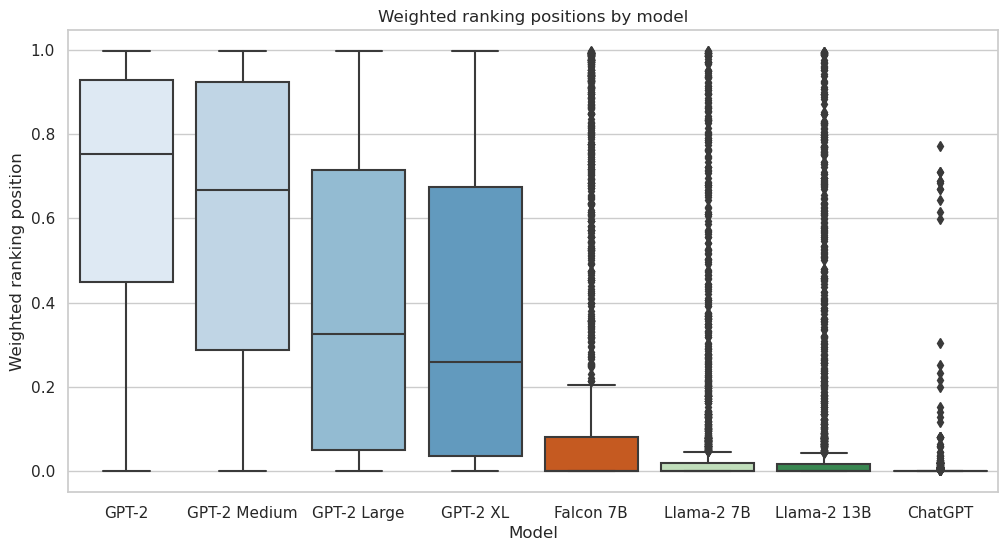

In [6]:
# boxplot of weighted_position
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 6))

# use color_dict to color models
ax = sns.boxplot(x="model", y="weighted_position", data=all_model_df, palette=color_dict)
ax.set_title(f'Weighted ranking positions by model')
ax.set_xlabel('Model')
ax.set_ylabel('Weighted ranking position')
plt.savefig(f'{plot_path}/weighted_position_boxplot.png', bbox_inches='tight', dpi=300)
plt.show()

In [7]:
# table with the statistics from the previous boxplot
all_model_df.groupby('model')['weighted_position'].describe()

/tmp/ipykernel_101662/2536731562.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_model_df.groupby('model')['weighted_position'].describe()


,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
GPT-2,2000.0,0.660848,0.305756,0.0,0.449256,0.753282,0.927536,0.996000
GPT-2 Medium,2000.0,0.590230,0.342645,0.0,0.287091,0.668142,0.924051,0.996000
GPT-2 Large,2000.0,0.399873,0.345718,0.0,0.050475,0.326028,0.714286,0.995434
GPT-2 XL,2000.0,0.366163,0.342939,0.0,0.035466,0.258286,0.674944,0.995536
Falcon 7B,2000.0,0.146815,0.291233,0.0,0.000000,0.000000,0.082353,0.995968
Llama-2 7B,2000.0,0.079182,0.206323,0.0,0.000000,0.000000,0.018606,0.995968
Llama-2 13B,2000.0,0.081779,0.210085,0.0,0.000000,0.000000,0.017425,0.994924
ChatGPT,2000.0,0.006078,0.052225,0.0,0.000000,0.000000,0.000000,0.771605


/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


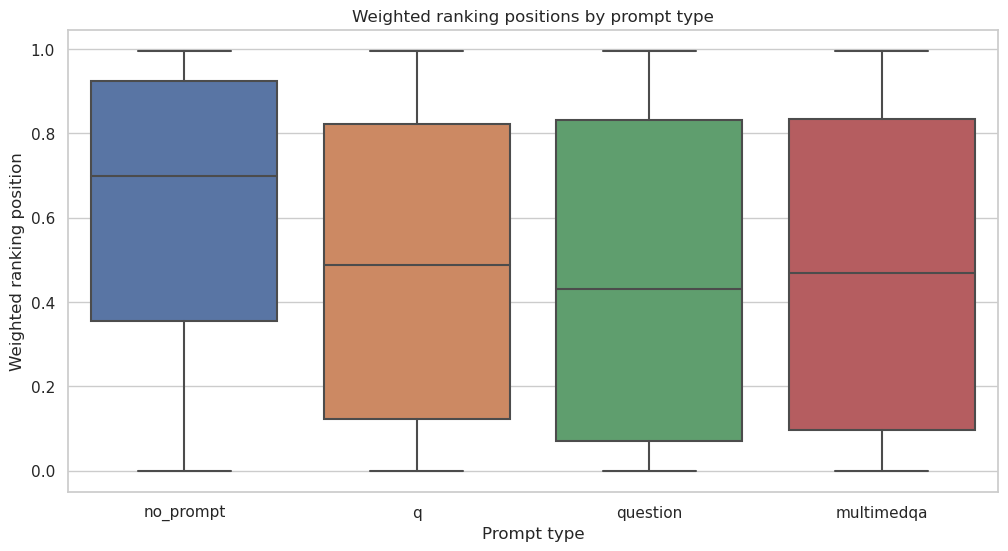

In [13]:
# boxplot of weighted position by prompt type

fig, ax = plt.subplots(figsize=(12, 6))
order = [
    "no_prompt",
    "q",
    "question",
    "multimedqa"
]


# only include models with GPT-2 in name
ax = sns.boxplot(x="prompt", y="weighted_position", data=all_model_df[all_model_df['model'].str.contains("GPT-2")], order=order)
ax.set_title(f'Weighted ranking positions by prompt type for GPT-2 models')

ax.set_xlabel('Prompt type')
ax.set_ylabel('Weighted ranking position')
plt.savefig(f'{plot_path}/weighted_position_boxplot_by_prompt.png', bbox_inches='tight', dpi=300)
plt.show()


/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


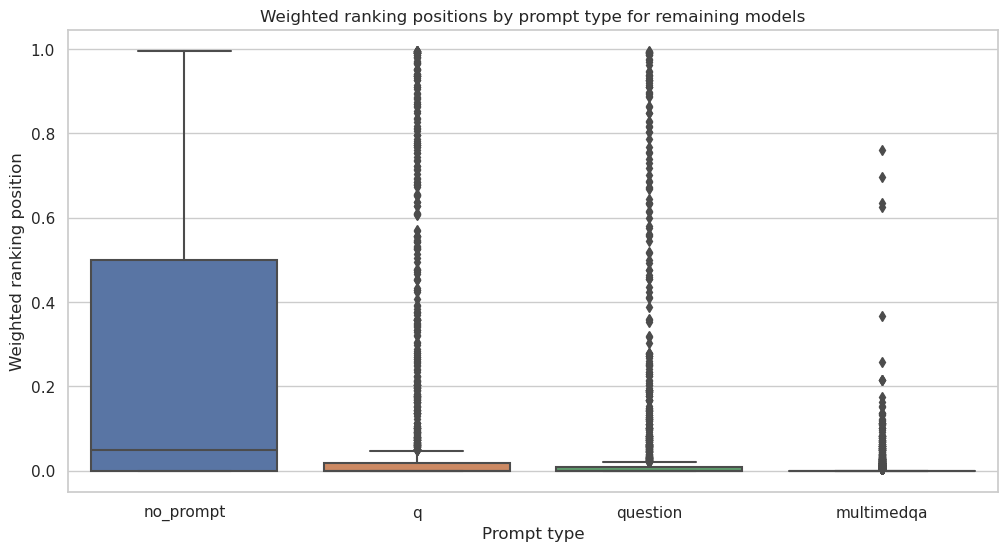

In [19]:
# second plot with remaining models
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.boxplot(x="prompt", y="weighted_position", data=all_model_df[all_model_df['model'].str.contains("Llama") | all_model_df['model'].str.contains("Falcon") ], order=order)
ax.set_title(f'Weighted ranking positions by prompt type for remaining models')
ax.set_xlabel('Prompt type')
ax.set_ylabel('Weighted ranking position')
plt.savefig(f'{plot_path}/weighted_position_boxplot_by_prompt_remaining.png', bbox_inches='tight', dpi=300)
plt.show()

In [24]:
# table of median rank by model, depending on prompt type
weigthed_position_by_prompt = all_model_df.groupby(['model', 'prompt'])['weighted_position'].mean().unstack()
# order columns
weigthed_position_by_prompt = weigthed_position_by_prompt[order]
# 3 decimals
weigthed_position_by_prompt = weigthed_position_by_prompt.round(3)
weigthed_position_by_prompt.to_csv(f'{plot_path}/weighted_position_by_prompt.csv') 

/tmp/ipykernel_101662/2794833134.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weigthed_position_by_prompt = all_model_df.groupby(['model', 'prompt'])['weighted_position'].mean().unstack()


/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


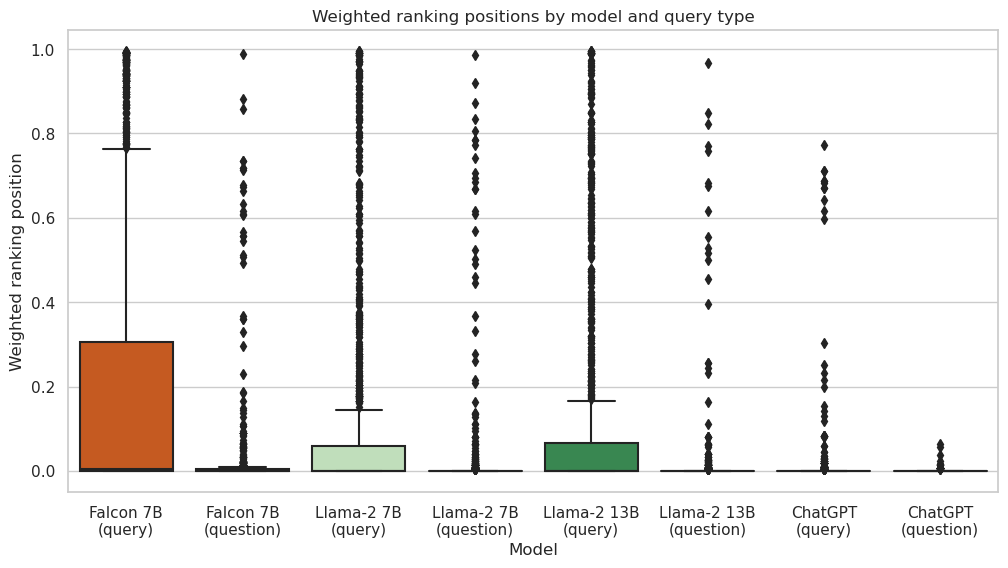

In [29]:
# same boxplot again, but question vs non-question
query_question_df = all_model_df[['docno', 'model', 'weighted_position', 'is_natural_question']]
# drop gpt 2 based model
query_question_df = query_question_df[~query_question_df['model'].str.contains("GPT-2")]

# add query type identifier to model name
# model back to string
query_question_df['model'] = query_question_df['model'].astype(str)
query_question_df['model'] = query_question_df['model'] +  query_question_df['is_natural_question'].map({True: '\n(question)', False: '\n(query)'})
# define same order as before on remaining models
order_with_question = [
    "Falcon 7B\n(query)",
    "Falcon 7B\n(question)",
    "Llama-2 7B\n(query)",
    "Llama-2 7B\n(question)",
    "Llama-2 13B\n(query)",
    "Llama-2 13B\n(question)",
    "ChatGPT\n(query)",
    "ChatGPT\n(question)",
]
query_question_df['model'] = pd.Categorical(query_question_df['model'], order_with_question)
# same color dict as before, adapted to new model names
color_with_question_dict = {
    "Falcon 7B\n(question)": sns.color_palette("Oranges")[1],
    "Falcon 7B\n(query)": sns.color_palette("Oranges")[4],
    "Llama-2 7B\n(question)": sns.color_palette("Greens")[2],
    "Llama-2 7B\n(query)": sns.color_palette("Greens")[1],
    "Llama-2 13B\n(question)": sns.color_palette("Greens")[5],
    "Llama-2 13B\n(query)": sns.color_palette("Greens")[4],
    "ChatGPT\n(question)": sns.color_palette("Reds")[5],
    "ChatGPT\n(query)": sns.color_palette("Reds")[4],
}
# add textures
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.boxplot(x="model", y="weighted_position", data=query_question_df, palette=color_with_question_dict)
ax.set_title(f'Weighted ranking positions by model and query type')
ax.set_xlabel('Model')
ax.set_ylabel('Weighted ranking position')

plt.savefig(f'{plot_path}/weighted_position_boxplot_by_model_and_question.png', bbox_inches='tight', dpi=300)
plt.show()


In [10]:
stats_per_model = all_model_df.groupby(['model']).agg({'weighted_position': ['mean', 'std'], 'num_answer_words': ['mean', 'std'], 'num_matching_words': ['mean', 'std']})
stats_per_model.columns = ['_'.join(col) for col in stats_per_model.columns.values]
stats_per_model = stats_per_model.reset_index()
stats_per_model = stats_per_model.sort_values(by=['weighted_position_mean'])
stats_per_model

/tmp/ipykernel_101662/880070476.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_per_model = all_model_df.groupby(['model']).agg({'weighted_position': ['mean', 'std'], 'num_answer_words': ['mean', 'std'], 'num_matching_words': ['mean', 'std']})


,model,weighted_position_mean,weighted_position_std,num_answer_words_mean,num_answer_words_std,num_matching_words_mean,num_matching_words_std
7,ChatGPT,0.006078,0.052225,220.8390,90.595071,18.6545,15.635868
5,Llama-2 7B,0.079182,0.206323,231.8830,98.199832,13.1375,11.640547
6,Llama-2 13B,0.081779,0.210085,248.2105,97.279869,16.3765,14.799705
4,Falcon 7B,0.146815,0.291233,113.2990,101.749143,13.6155,29.175268
3,GPT-2 XL,0.366163,0.342939,281.0190,130.791008,9.2440,11.622565
2,GPT-2 Large,0.399873,0.345718,288.8100,134.563950,9.2540,12.587641
1,GPT-2 Medium,0.590230,0.342645,212.0685,135.578732,1.4190,2.120303
0,GPT-2,0.660848,0.305756,234.9285,128.802401,1.4330,2.213812


In [11]:
# plot weighted_position aginst num_answer_words, draw regression line
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# ax = sns.scatterplot(x="num_answer_words", y="weighted_position", data=all_model_df, palette="Blues")

# draw regression line
ax = sns.regplot(x="num_answer_words", y="weighted_position", data=all_model_df[[all_model_df["weighted_position"] > 100]], scatter=True, ci=None, color='b', line_kws={'color':'r'})

ax.set_title(f'Weighted ranking position by model')
ax.set_xlabel('Mean number of answer words')
ax.set_ylabel('Mean weighted ranking position')
plt.show()

KeyError: "None of [Index([(False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, ...)], dtype='object')] are in the [columns]"

In [ ]:
hf_llm_leaderboard = pd.read_csv('huggingface_llm_leaderboards.csv')

In [ ]:
# join hf_llm_leaderboard and stats_per_model on model
# keep all cols from hf_llm_leaderboard and add weighted_position_mean

joined_df = pd.merge(hf_llm_leaderboard, stats_per_model, on='model', how='left')

In [ ]:
# only keep cols model, ARC, HellaSwag, MMLU, weighted_position_mean in joined_df
joined_df = joined_df[['model', 'ARC', 'HellaSwag', 'MMLU', 'weighted_position_mean']]
joined_df = joined_df.rename(columns={'weighted_position_mean': 'weighted_position'})
# move weighted_position to the beginning of the df
joined_df = joined_df[['model', 'weighted_position', 'ARC', 'HellaSwag', 'MMLU']]
# order by weighted_position
joined_df = joined_df.sort_values(by=['weighted_position'])
joined_df.to_csv('llm_positions.csv', index=False)

/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


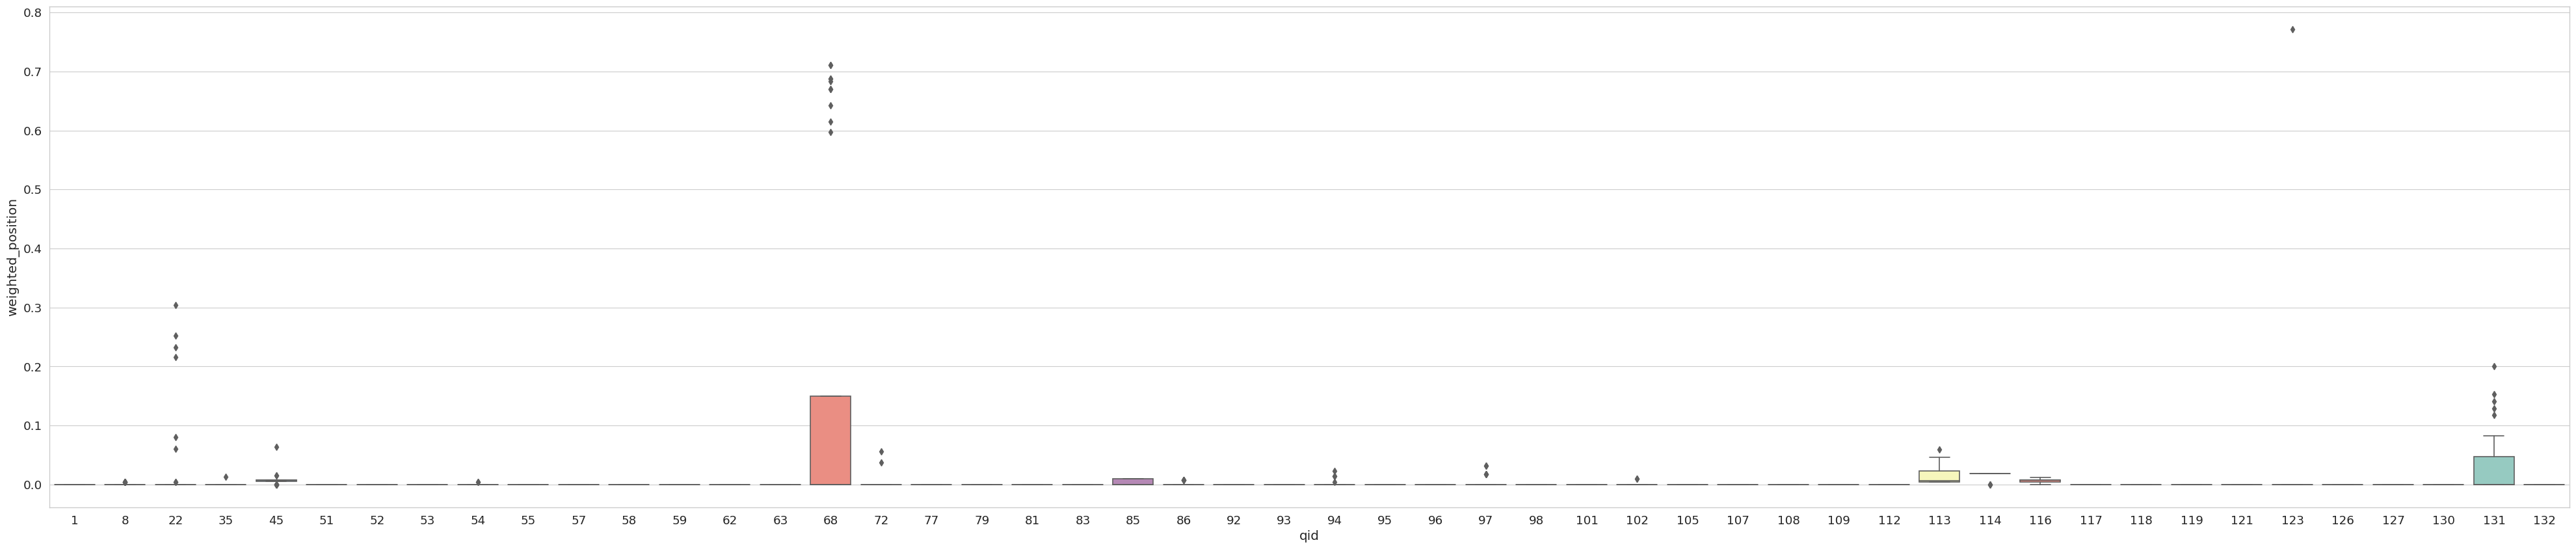

In [ ]:
# make this into a nice boxplot
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
# increase plot size
plt.rcParams["figure.figsize"] = (50, 10)
model_order = ['gpt2', 'gpt2-medium', 'gpt2-large', 'gpt2-xl', 'tiiuae_falcon-7b-instruct', 'meta-llama_Llama-2-7b-chat-hf', 'meta-llama_Llama-2-13b-chat-hf', 'chatgpt']

plt = sns.boxplot(x="qid", y="weighted_position", data=all_model_df[all_model_df['model'] == 'chatgpt'], palette="Set3")

In [ ]:
stats_per_prompt = all_model_df.groupby(['prompt']).agg({'weighted_position': ['mean', 'std'], 'num_answer_words': ['mean', 'std'], 'num_matching_words': ['mean', 'std']})
stats_per_prompt.columns = ['_'.join(col) for col in stats_per_prompt.columns.values]
stats_per_prompt = stats_per_prompt.reset_index()
stats_per_prompt = stats_per_prompt.sort_values(by=['weighted_position_mean'])
stats_per_prompt

,prompt,weighted_position_mean,weighted_position_std,num_answer_words_mean,num_answer_words_std,num_matching_words_mean,num_matching_words_std
0,multimedqa,0.239411,0.344033,258.74975,114.394550,11.75425,13.526921
3,question,0.250514,0.348299,222.28875,124.296926,10.65900,17.799099
2,q,0.275188,0.353243,224.05275,127.659056,10.07525,16.956576
1,no_prompt,0.400371,0.383879,210.43750,134.167669,9.07850,15.100442


In [ ]:
stats_per_query = all_model_df.groupby(['qid', 'query']).agg({'weighted_position': ['mean', 'std'], 'num_answer_words': ['mean', 'std'], 'num_matching_words': ['mean', 'std']})
stats_per_query.columns = ['_'.join(col) for col in stats_per_query.columns.values]
stats_per_query = stats_per_query.reset_index()
stats_per_query = stats_per_query.sort_values(by=['weighted_position_mean'])
stats_per_query = stats_per_query.reset_index(drop=True)
stats_per_query

,qid,query,weighted_position_mean,weighted_position_std,num_answer_words_mean,num_answer_words_std,num_matching_words_mean,num_matching_words_std
0,93,Does multiple sclerosis relate to sleeping problems and forgetfulness in older people?,0.069792,0.187819,250.721875,125.346520,19.540625,12.857243
1,1,What are the most common chronic diseases? What effects do chronic diseases have for the society...,0.100357,0.202128,260.412500,118.738689,42.118750,28.899105
2,81,Can I work and study full-time with multiple sclerosis?,0.100671,0.222970,241.484375,124.504811,17.275000,15.128064
3,77,How do menopause symptoms relate to multiple sclerosis symptoms?,0.101821,0.206791,267.787500,103.641436,14.025000,8.997352
4,53,what is psychotherapy?,0.130330,0.240106,229.875000,129.655185,2.675000,2.617879
5,35,Is a ketogenic / keto diet suitable for people with diabetes?,0.136149,0.247459,229.665625,125.699263,19.856250,15.815292
6,54,What does multiple sclerosis diagnosis include? What does it change?,0.141895,0.192357,277.631250,114.534720,6.781250,4.505896
7,63,Will multiple sclerosis affect my career?,0.150175,0.305320,256.675000,125.634917,3.590625,3.281645
8,79,Can I pass multiple sclerosis to other family members?,0.152566,0.273309,216.781250,130.970823,11.531250,8.656758
9,62,"disclosing multiple sclerosis at work, how will colleagues react?",0.157926,0.249632,236.212500,132.700686,5.028125,5.140273
